In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8991c4d15a8ebdc5190cc0c0c140108
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8991c4d15a8ebdc5190cc0c0c140108&q=Boston


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belaya gora
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | nabire
Processing Record 5 of Set 1 | sao paulo de olivenca
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | byron bay
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | litoral del san juan
City not found. Skipping...
Processing Record 10 of Set 1 | chicama
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | zalantun
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | bagan
Processing Record 16 of Set 1 | waipawa
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | san patricio
Processing R

Processing Record 37 of Set 4 | brownwood
Processing Record 38 of Set 4 | ningbo
Processing Record 39 of Set 4 | barra do garcas
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | ankazoabo
Processing Record 42 of Set 4 | kaeo
Processing Record 43 of Set 4 | pineville
Processing Record 44 of Set 4 | bella union
Processing Record 45 of Set 4 | vaini
Processing Record 46 of Set 4 | mayumba
Processing Record 47 of Set 4 | khandyga
Processing Record 48 of Set 4 | loreto
Processing Record 49 of Set 4 | santa teresa
Processing Record 50 of Set 4 | lianran
Processing Record 1 of Set 5 | mahajanga
Processing Record 2 of Set 5 | progreso
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | ryotsu
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | freeport
Processing Record 7 of Set 5 | storforshei
Processing Record 8 of Set 5 | savannah bight
Processing Record 9 of Set 5 | rock sound
Processing Record 10 of Set 5 | bolu
Processing Recor

Processing Record 29 of Set 8 | wenling
Processing Record 30 of Set 8 | tottori
Processing Record 31 of Set 8 | jishou
Processing Record 32 of Set 8 | poum
Processing Record 33 of Set 8 | ilhabela
Processing Record 34 of Set 8 | seoul
Processing Record 35 of Set 8 | vardo
Processing Record 36 of Set 8 | quanzhou
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | meulaboh
Processing Record 39 of Set 8 | port hardy
Processing Record 40 of Set 8 | gort
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | kaohsiung
Processing Record 43 of Set 8 | wajir
Processing Record 44 of Set 8 | thompson
Processing Record 45 of Set 8 | bogorodskoye
Processing Record 46 of Set 8 | butaritari
Processing Record 47 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 8 | longyearbyen
Processing Record 49 of Set 8 | turinskaya sloboda
Processing Record 50 of Set 8 | bar harbor
Processing Record 1 of Set 9 | boguchany
Processing Record 2 of 

Processing Record 19 of Set 12 | hualmay
Processing Record 20 of Set 12 | voh
Processing Record 21 of Set 12 | karpogory
Processing Record 22 of Set 12 | bosaso
Processing Record 23 of Set 12 | ancona
Processing Record 24 of Set 12 | itacarambi
Processing Record 25 of Set 12 | bogale
Processing Record 26 of Set 12 | ojinaga
Processing Record 27 of Set 12 | guanica
Processing Record 28 of Set 12 | gobabis
Processing Record 29 of Set 12 | gravenhurst
Processing Record 30 of Set 12 | nanortalik
Processing Record 31 of Set 12 | parys
Processing Record 32 of Set 12 | dzhebariki-khaya
Processing Record 33 of Set 12 | port lincoln
Processing Record 34 of Set 12 | hailar
Processing Record 35 of Set 12 | manzil salim
Processing Record 36 of Set 12 | shvartsevskiy
Processing Record 37 of Set 12 | sovetskaya
Processing Record 38 of Set 12 | araucaria
Processing Record 39 of Set 12 | simao
Processing Record 40 of Set 12 | bhigvan
Processing Record 41 of Set 12 | lavrentiya
Processing Record 42 of 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Belaya Gora,68.5333,146.4167,47.50,61,100,6.02,RU,2021-09-14 21:25:16
1,Mataura,-46.1927,168.8643,37.47,70,8,2.24,NZ,2021-09-14 21:25:16
2,Rikitea,-23.1203,-134.9692,73.76,78,75,10.11,PF,2021-09-14 21:25:17
3,Nabire,-3.3667,135.4833,73.89,91,98,3.36,ID,2021-09-14 21:25:17
4,Sao Paulo De Olivenca,-3.3783,-68.8725,84.13,66,66,3.42,BR,2021-09-14 21:25:17
5,Byron Bay,-28.6500,153.6167,58.95,70,79,14.76,AU,2021-09-14 21:23:58
6,Hermanus,-34.4187,19.2345,54.90,70,100,3.49,ZA,2021-09-14 21:25:18
7,Chicama,-7.8447,-79.1469,61.34,64,8,10.65,PE,2021-09-14 21:25:18
8,Airai,-8.9266,125.4092,59.41,71,45,2.89,TL,2021-09-14 21:25:18
9,Zalantun,48.0000,122.7167,49.66,92,100,1.88,CN,2021-09-14 21:25:18


In [17]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Belaya Gora,RU,2021-09-14 21:25:16,68.5333,146.4167,47.50,61,100,6.02
1,Mataura,NZ,2021-09-14 21:25:16,-46.1927,168.8643,37.47,70,8,2.24
2,Rikitea,PF,2021-09-14 21:25:17,-23.1203,-134.9692,73.76,78,75,10.11
3,Nabire,ID,2021-09-14 21:25:17,-3.3667,135.4833,73.89,91,98,3.36
4,Sao Paulo De Olivenca,BR,2021-09-14 21:25:17,-3.3783,-68.8725,84.13,66,66,3.42
...,...,...,...,...,...,...,...,...,...
584,Tilichiki,RU,2021-09-14 21:27:32,60.4667,166.1000,36.79,66,16,7.02
585,Tello,CO,2021-09-14 21:27:33,3.0669,-75.1378,90.63,37,14,1.10
586,Kachug,RU,2021-09-14 21:27:33,53.9606,105.8817,36.07,91,5,1.19
587,Faya,SA,2021-09-14 21:27:33,18.3851,42.4509,68.11,47,44,5.03


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631661658.2544913

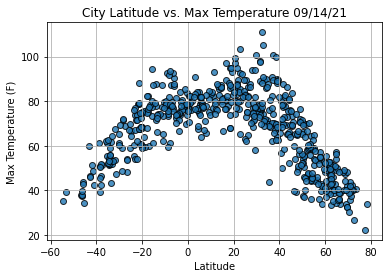

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

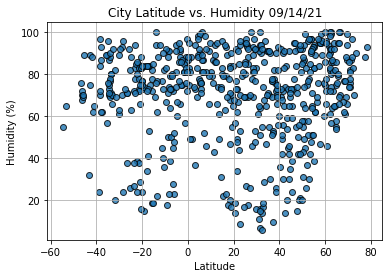

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()